In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import arviz as az
from statsmodels.tsa import stattools
import statsmodels.api as sm
import pymc3 as pm
import pymc

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

### EM for Mixture of two gaussians

We're going to look at an implementation of an Algorithm for
feeding a location mixture of two Gaussian components. So the only thing that is going to be different between those two  components, it's going to be the mean of the distributions,
the variances are going to be the same for both components. 

In [2]:
### Example of an EM algorithm for fitting a location mixture of 2 Gaussian components
### The algorithm is tested using simulated data

from scipy.stats import norm

## Clear the environment and load required libraries
np.random.seed(1)

## Generate data from a mixture with 2 components
KK         = 2 # Number of componentes
w_true     = [0.6, 0.4]  # True weights associated with the components
mu_true    = [0, 5]   # True mean for the first and secondcomponent
sigma_true = [1, 1]   # True standard deviation of all components
n          = 120         # Number of observations to be generated
### Step 1 ### Sample component indicators
cc    = np.random.choice([0, 1], n, p = w_true) # C_i sample 
x     = []
### Step 2 ### Sample from normal distribution
for i in range(n):
  x.append(norm.rvs(loc = mu_true[cc[i]], scale = sigma_true[cc[i]], size = 1)[0])

x = np.array(x)
print('The first five samples of C_i are: {}'.format(cc[:5]))
print('The first five samples of the mixture are: {}'.format(x[:5]))

The first five samples of C_i are: [0 1 0 0 0]
The first five samples of the mixture are: [ 0.12182127  6.12948391  1.19891788  0.18515642 -0.37528495]


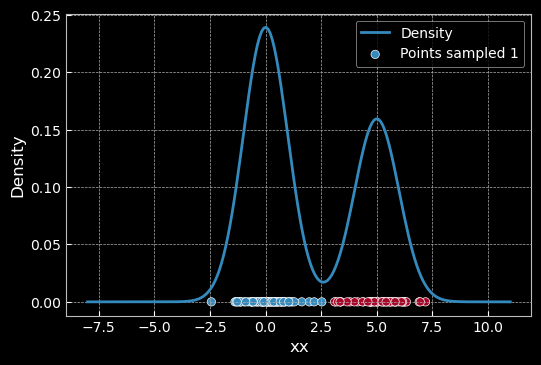

In [3]:
### Plotting the true distributions

# Plot f(x) along with the observations just sampled

# Values to sample
xx_true = np.linspace(-8, 11.0, num = 200)

yy_true = w_true[0] * norm.pdf(loc = mu_true[0], scale = sigma_true[0], x = xx_true) + w_true[1] * norm.pdf(loc = mu_true[1], scale = sigma_true[1], x = xx_true)

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
sns.lineplot(xx_true, yy_true)
sns.scatterplot(np.array(x), np.zeros(len(x)), hue = cc)
plt.xlabel('xx')
plt.ylabel('Density')
plt.legend(['Density', 'Points sampled 1'])
plt.show()

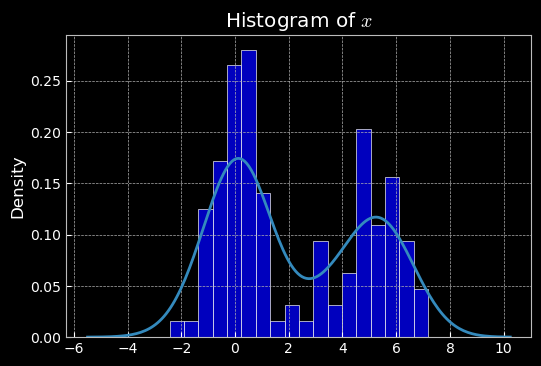

In [4]:
# Density estimation of X
fig, ax = plt.subplots(1, 1)
sns.histplot(x, stat= 'density', bins = 18)
sns.kdeplot(x, bw_adjust = 1.0, label = 'Density estimate $x$')
plt.title('Histogram of $x$')
plt.show()

### EM algorithm

The initial guess for mu are: [-0.71953187  7.40285788]
The initial guess for sigma are: 2.6412606675636803


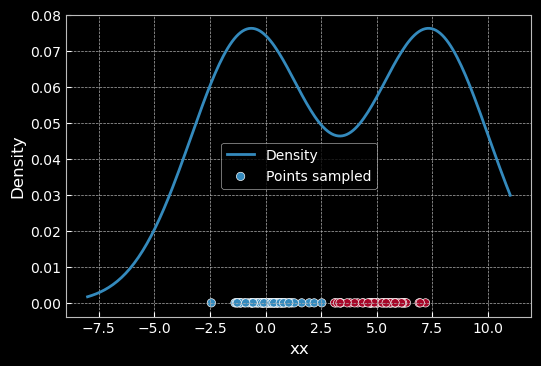

In [5]:
## Initialize the parameters
w     = 0.5                         # Assign equal weight to each component to start with
mu    = norm.rvs(loc = np.mean(x), scale = np.std(x), size = 2)   # np.array([2.95, -0.996]) Random cluster centers randomly spread over the support of the data
sigma = np.std(x)                   # Initial standard deviation  2.5914

print('The initial guess for mu are: {}'.format(mu))
print('The initial guess for sigma are: {}'.format(sigma))

# Values to sample
xx = np.linspace(-8, 11.0, num = 200)
yy = w * norm.pdf(loc = mu[0], scale = sigma, x = xx) + w * norm.pdf(loc = mu[1], scale = sigma, x = xx)

# Plot the initial guess for the density
fig, ax = plt.subplots(1, 1)
sns.lineplot(xx, yy)
sns.scatterplot(np.array(x), np.zeros(len(x)), hue = cc)
plt.xlabel('xx')
plt.ylabel('Density')
plt.legend(['Density', 'Points sampled'])
plt.show()

The initial guess for mu1 is -0.7195318707780571 and mu2 7.402857884906117
[[-2.63407663 -6.38290728]
 [-5.94538927 -2.6995563 ]
 [-2.84712597 -5.34190344]
 [-2.6420025  -6.31709265]
 [-2.59183556 -6.91944219]]
Mu values [0.53991632 5.04913342]
Sigma values 1.4847776047609036
Weight values 0.6237867339818527
The iteration 1 has a Q value of -297.1660079666172


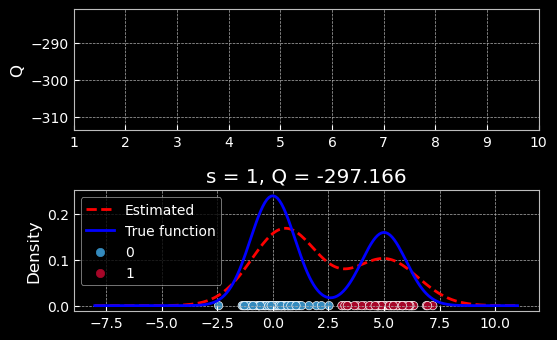

[[-1.82579608 -7.79819734]
 [-8.87219046 -2.5565164 ]
 [-1.88464661 -5.65395408]
 [-1.81469437 -7.65754989]
 [-1.97611826 -8.96530076]]
Mu values [0.26632573 5.15717577]
Sigma values 1.1055163148974583
Weight values 0.5972033754825835
The iteration 2 has a Q value of -263.205639791564


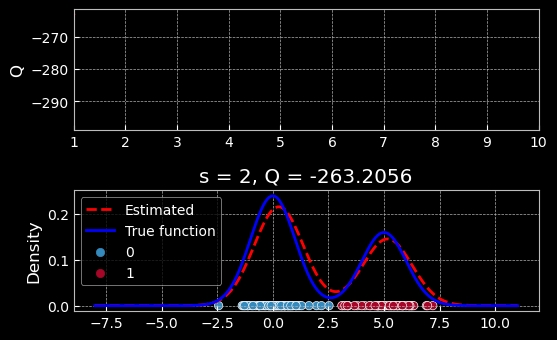

[[ -1.54329141 -12.30146503]
 [-15.59855611  -2.31533984]
 [ -1.89056272  -8.33842447]
 [ -1.53744397 -12.04216379]
 [ -1.70316438 -14.45065151]]
Mu values [0.1451956  5.12281065]
Sigma values 0.9696535985878083
Weight values 0.5798895676644433
The iteration 3 has a Q value of -248.21397202347066


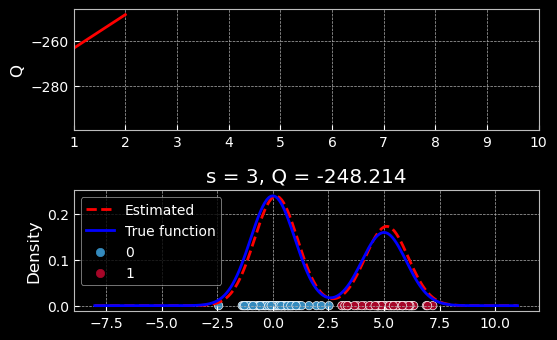

[[ -1.43333029 -15.05526799]
 [-20.47719853  -2.29426683]
 [ -2.02349786  -9.94323172]
 [ -1.43388893 -14.72052717]
 [ -1.57710053 -17.83074367]]
Mu values [0.11584456 5.10058733]
Sigma values 0.9500693822364806
Weight values 0.5746021104696827
The iteration 4 has a Q value of -245.96313951771552


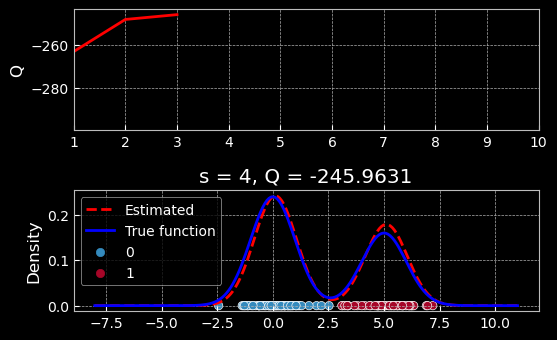

[[ -1.42181552 -15.45346861]
 [-21.45424803  -2.30886055]
 [ -2.0715888  -10.15502541]
 [ -1.42445691 -15.10634457]
 [ -1.55540956 -18.33230889]]
Mu values [0.11097259 5.09592431]
Sigma values 0.9479387857208385
Weight values 0.5736426058324297
The iteration 5 has a Q value of -245.72812038883512


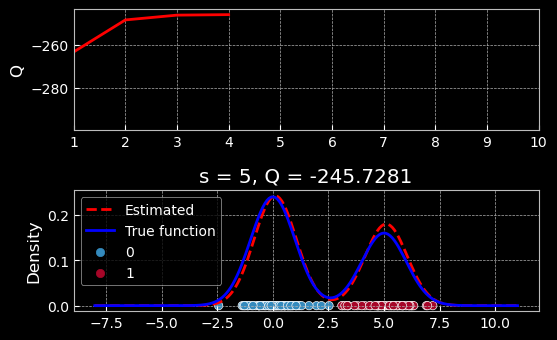

[[ -1.42128739 -15.48493977]
 [-21.5764437   -2.31235279]
 [ -2.07982464 -10.16824149]
 [ -1.42428406 -15.13658224]
 [ -1.55278742 -18.374156  ]]
Mu values [0.11022169 5.09513141]
Sigma values 0.9476953722433623
Weight values 0.5734883793205253
The iteration 6 has a Q value of -245.7027883849823


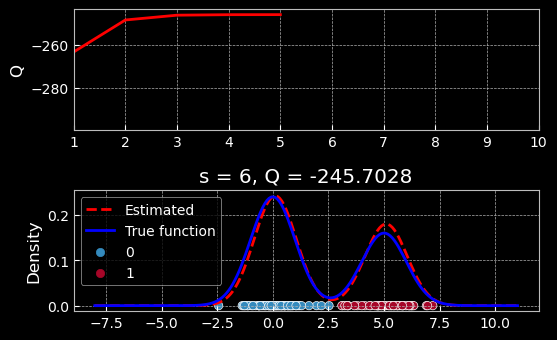

[[ -1.42130888 -15.48700323]
 [-21.59184294  -2.31295251]
 [ -2.08108499 -10.16852434]
 [ -1.42436004 -15.13852265]
 [ -1.55246086 -18.37726496]]
Mu values [0.11010709 5.09500559]
Sigma values 0.9476636584765878
Weight values 0.5734644302444263
The iteration 7 has a Q value of -245.69962343884677


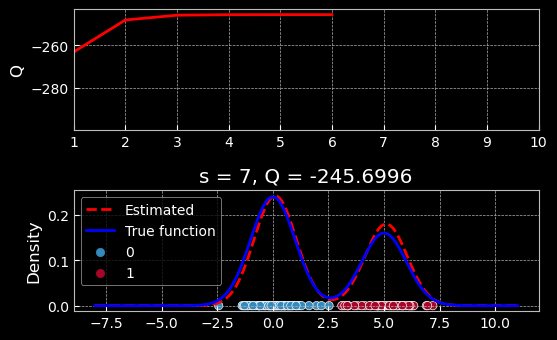

In [6]:
from scipy.stats import lognorm

s  = 0     # Counter of the current iteration
sw = False # Decide when the algorithm will end
QQ = np.NINF  # Value of Q to monitor convergence
QQ_out = []
epsilon = 10e-5  # Stopping criteria

print('The initial guess for mu1 is {} and mu2 {}'.format(mu[0], mu[1]))
## Checking convergence of the algorithm
while(not sw):
  ## Expectation (E) step
  v = np.zeros((n, KK))
  v[:, 0] = np.log(w) + norm.logpdf(loc = mu[0], scale = sigma, x = x)    # Compute the log of the weights
  v[:, 1] = np.log(1 - w) + norm.logpdf(loc = mu[1], scale = sigma, x = x)  # Compute the log of the weights
  print(v[:5, :])
  for i in range(n):
    v[i, :] = np.exp(v[i, :] - max(v[i, : ])) / np.sum(np.exp(v[i, :] - max(v[i, :])))  # Go from logs to actual weights in a numerically stable manner
  ## Maximization (M) step
  # Weights
  w = np.mean(v[: ,0])
  # Mus
  mu = np.zeros(KK)
  for k in range(KK):
    for i in range(n):
      # Update Mu
      mu[k] = mu[k] + (v[i,k] * x[i])
    mu[k] = mu[k] / np.sum(v[:, k])

  # Standard deviations
  sigma = 0
  for i in range(n):
    for k in range(KK):
      sigma = sigma + (v[i,k] * ((x[i] - mu[k])**2))
  sigma = np.sqrt(sigma / np.sum(v))

  print('Mu values {}'.format(mu))
  print('Sigma values {}'.format(sigma))
  print('Weight values {}'.format(w))

  ##Check convergence
  QQn = 0 # Value of Q function at current iteration
  for i in range(n):
    QQn = QQn + v[i, 0]*(np.log(w) + norm.logpdf(loc = mu[0], scale =sigma, x = x[i])) + \
                v[i, 1]*(np.log(1 - w) + norm.logpdf(loc = mu[1], scale =sigma, x = x[i]))
  
  # If relative error is less than epsilon stop
  if(np.abs(QQn - QQ) / np.abs(QQn) < epsilon):
    sw = True
  QQ = QQn
  QQ_out.append(QQ)
  s = s + 1
  print('The iteration {} has a Q value of {}'.format(s, QQn))

  fig, axs = plt.subplots(2)
  axs[0].plot(QQ_out[0 : s], c = 'red')
  axs[0].set_ylabel('Q')
  axs[0].axis(xmin = 1, xmax = max(10, s))
  axs[1].set_title("Q-value over iterations")

  # Values to sample
  xx = np.linspace(-8, 11.0, num = 200)
  yy = w * norm.pdf(loc = mu[0], scale = sigma, x = xx) + (1 - w) * norm.pdf(loc = mu[1], scale = sigma, x = xx)

  # Plot the initial guess for the density
  axs[1].plot(xx, yy, '--', color = 'red', label = 'Estimated')
  axs[1].plot(xx_true, yy_true, 'blue', label = 'True function')
  axs[1] = sns.scatterplot(np.array(x), np.zeros(len(x)), hue = cc)
  axs[1].set_ylabel('x')
  axs[1].set_ylabel('Density')
  axs[1].set_title("s = {}, Q = {}".format(s, np.round(QQ_out[s - 1], 4)))
  fig.subplots_adjust(hspace=0.5)
  plt.show()

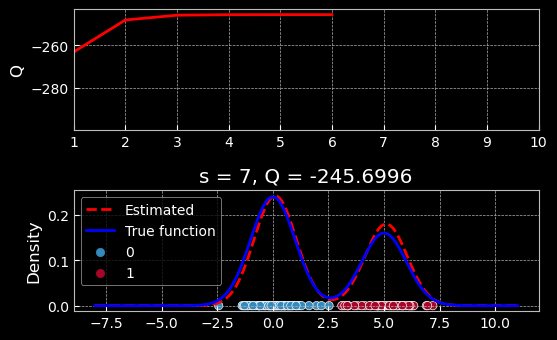

In [7]:
fig, axs = plt.subplots(2)
axs[0].plot(QQ_out[0 : s], c = 'red')
axs[0].set_ylabel('Q')
axs[0].axis(xmin = 1, xmax = max(10, s))
axs[1].set_title("Q-value over iterations")

# Values to sample
xx = np.linspace(-8, 11.0, num = 200)
yy = w * norm.pdf(loc = mu[0], scale = sigma, x = xx) + (1 - w) * norm.pdf(loc = mu[1], scale = sigma, x = xx)

# Plot the initial guess for the density
axs[1].plot(xx, yy, '--', color = 'red', label = 'Estimated')
axs[1].plot(xx_true, yy_true, 'blue', label = 'True function')
axs[1] = sns.scatterplot(np.array(x), np.zeros(len(x)), hue = cc)
axs[1].set_ylabel('x')
axs[1].set_ylabel('Density')
axs[1].set_title("s = {}, Q = {}".format(s, np.round(QQ_out[s - 1], 4)))
fig.subplots_adjust(hspace=0.5)
plt.show()